In [2]:
#load modules
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import PSTHM
from tqdm.notebook import tqdm
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patheffects as mpe
import torch
from China_RSL import gp_kernel_decomposition
from China_RSL import calculate_sdsl

#set plotting style
%matplotlib inline
font = {'weight':'normal',
       'size':20}

matplotlib.rc('font',**font)
matplotlib.rcParams['figure.figsize'] = (12, 6)
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["font.family"] = "Helvetica"


### Using an analytical model to calculate sterodynamic sea level respond to river discharge at Qiantang River (Hangzhou), Figure S10

**Analytical model source:** 

Piecuch, C.G., 2023. River effects on sea-level rise in the Río de la Plata estuary during the past century. Ocean Science, 19(1), pp.57-75.

**Qiantang river width and depth data source:** 

Xie, D., Gao, S., Wang, Z.B., Pan, C., Wu, X. and Wang, Q., 2017. Morphodynamic modeling of a large inside sandbar and its dextral morphology in a convergent estuary: Qiantang Estuary, China. Journal of Geophysical Research: Earth Surface, 122(8), pp.1553-1572.


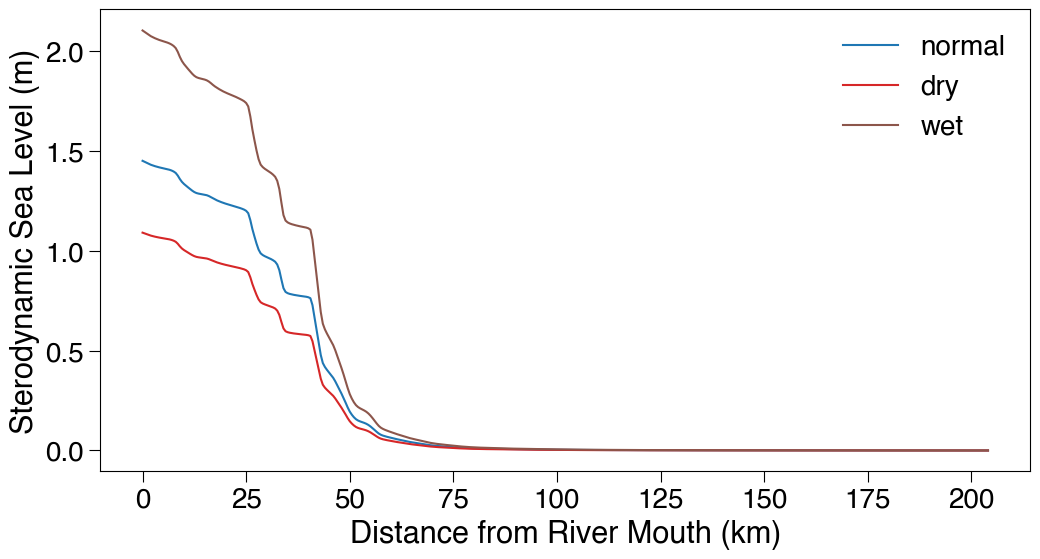

In [ ]:
qt_river_depth = np.loadtxt('../Data/Qiantang_river_depth.csv',delimiter=',')
qt_river_width = np.loadtxt('../Data/Qiantang_river_witdh.csv',delimiter=',')
qt_river_width_index = np.argsort(qt_river_width[:,0])
qt_river_width =qt_river_width[qt_river_width_index]
interp_x = np.arange(77.5,282,0.5)
interp_river_depth = np.interp(interp_x,qt_river_depth[:,0],qt_river_depth[:,1])
interp_river_width = np.interp(interp_x,qt_river_width[:,0],qt_river_width[:,1])
interp_river_depth = -interp_river_depth - np.min(-interp_river_depth)+1e-3
interp_river_depth[interp_river_depth<0.3] =0.3
interp_x-=interp_x[0]


# Example usage of the function
cdu = 0.001  # Example value
q = 800  # Example value
g = 9.81  # Acceleration due to gravity
# Assuming W_m (width in meters) and H_m (depth in meters) are already defined along with interp_x
# interp_x = np.arange(start, stop, step) # Define based on your data
W_m = interp_river_width * 1000  # Convert width from km to m
H_m = interp_river_depth  # Depth in m

zeta_values = calculate_sdsl(cdu, 752, g, W_m, H_m, interp_x) #dry season 752m3/s
zeta_values2 = calculate_sdsl(cdu, 1000, g, W_m, H_m, interp_x) #normal season 1000m3/s
zeta_values3 = calculate_sdsl(cdu, 1450, g, W_m, H_m, interp_x) #wet season 1450m3/s


# Plotting
# plt.figure(figsize=(10, 6))
plt.plot(interp_x,zeta_values2, 'C0',label='normal')
plt.plot(interp_x,zeta_values, 'C3',label='dry')
plt.plot(interp_x,zeta_values3, 'C5',label='wet')
# plt.plot(interp_x, zeta_values2, 'r-')
plt.xlabel('Distance from River Mouth (km)')
plt.ylabel('Sterodynamic Sea Level (m)')
# plt.grid(True)
plt.legend()
plt.show()